In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("seealsology_data.tsv", sep = "\t")

In [3]:
df.head()

,source,target,depth
0,animal crossing,4gamer.net,1
1,animal crossing,amiibo,1
2,animal crossing,amiibo festival,1
3,animal crossing,android (operating system),1
4,animal crossing,animal crossing: amiibo festival,1


In [4]:
df.shape

(366405, 3)

In [5]:
# 构造无定向图
G=nx.from_pandas_edgelist(df, "source", "target", edge_attr=True, create_using=nx.Graph())

In [6]:
len(G) # 节点数 ？个Wikipedia页面

140806

In [7]:
# function 生成节点的随机行走序列
#它将从指定的输入节点以随机的方式穿过连接节点。最后,它将返回遍历节点的顺序
def get_randomwalk(node, path_length):
    
    random_walk = [node]
    
    for i in range(path_length-1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

In [8]:
#节点space exploration 随机游走10
get_randomwalk('space exploration', 8)

['space exploration',
 'science fiction',
 'soviet union',
 'street fighter ii',
 "swing'n",
 'street fighter',
 'tekken',
 'ken masters']

In [9]:
# 从图获取所有节点的列表
all_nodes = list(G.nodes())


In [10]:
random_walks = []

for n in tqdm(all_nodes):
    for i in range(2):
        random_walks.append(get_randomwalk(n,10))

100%|██████████| 140806/140806 [01:18<00:00, 1786.44it/s]


In [11]:
# count of sequences  2088*5 = 10440
len(random_walks)
# random_walks

281612

In [12]:
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

In [13]:
# 训练skip-gram (word2vec)模型
model = Word2Vec(window = 4, sg = 1, hs = 0,
                 negative = 10, # 负采样
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

In [14]:
model.build_vocab(random_walks, progress_per=2)

In [15]:
model.train(random_walks, total_examples = model.corpus_count, epochs=20, report_delay=1)

(29028509, 33494920)

In [16]:
model.save("gen/model")

In [17]:
import  time
t1 = time.time()
model = Word2Vec.load('gen/model')
t2 = time.time()
print(model)
print(".molde load time %.4f"%(t2-t1))

Word2Vec(vocab=75865, size=100, alpha=0.03)
.molde load time 1.0531


In [48]:
# find top n similar nodes
all_wordList=['genshin impact','animal crossing','the legend of zelda','nintendo switch','playstation 5']

similar_wordList=['genshin impact','animal crossing','the legend of zelda','nintendo switch','playstation 5']

# similar_wordList+=(model.similar_by_word('genshin impact'))
# similar_wordList+=(model.similar_by_word('animal crossing'))
# similar_wordList+=(model.similar_by_word('the legend of zelda'))
# similar_wordList+=(model.similar_by_word('nintendo switch'))
# similar_wordList+=(model.similar_by_word('playstation 5'))
for word in all_wordList:
    for tmp in model.similar_by_word(word,topn=5): #选最近的5个
        similar_wordList.append(tmp[0])
# similar_wordList={}
# similar_wordList['genshin impact'] = model.similar_by_word('genshin impact',topn=5)
# similar_wordList['animal crossing'] = model.similar_by_word('animal crossing',topn=5)
# similar_wordList['the legend of zelda'] = model.similar_by_word('the legend of zelda',topn=5)
# similar_wordList['nintendo switch'] = model.similar_by_word('nintendo switch',topn=5)
# similar_wordList['playstation 5'] = model.similar_by_word('playstation 5',topn=5)

In [39]:
similar_wordList = model.similar_by_word('genshin impact')

In [ ]:
# terms = ['lunar escape systems','soviet moonshot', 'soyuz 7k-l1', 'moon landing',
#          'space food', 'food systems on space exploration missions', 'meal, ready-to-eat',
#          'space law', 'metalaw', 'moon treaty', 'legal aspects of computing',
#          'astronaut training', 'reduced-gravity aircraft', 'space adaptation syndrome', 'micro-g environment']

# terms = ['u.s. state','joe coviello','initial public offering','dead rising','sakura kasugano','street fighter','suleputer',
#          'animal','evolutionary radiation' ]

a = df['target'].tolist()
terms = random.sample(a, 3)
terms

In [62]:
def plot_nodes(word_list):
    X = model[word_list]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    
    plt.figure(figsize=(10,12))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.gca().set_aspect('equal', 'datalim')

    plt.title('cosine measure')
    plt.savefig('./cosine measure.jpg')
    plt.show()

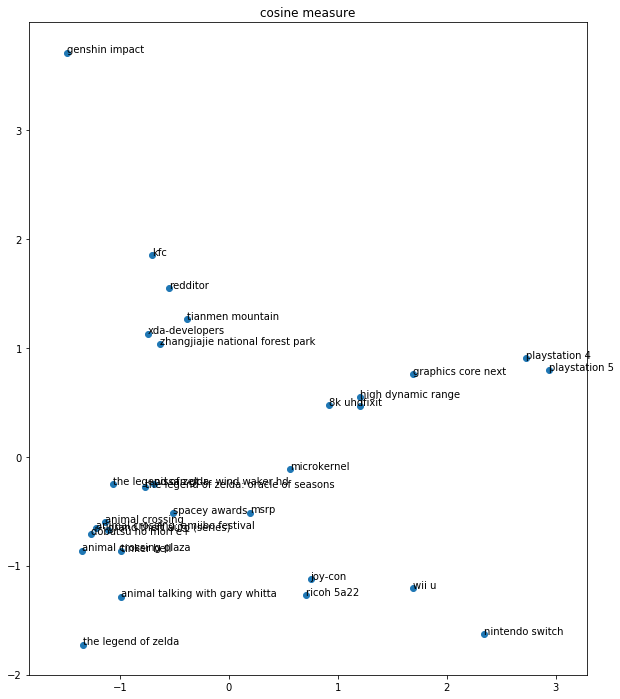

In [63]:
plot_nodes(similar_wordList)

In [132]:
finally_word = []
for i in tqdm(a):
    try:
        model[i]

    except:
        continue
    else:
        finally_word.append(i)
len(finally_word)

100%|██████████| 366405/366405 [00:01<00:00, 202595.16it/s]


295268

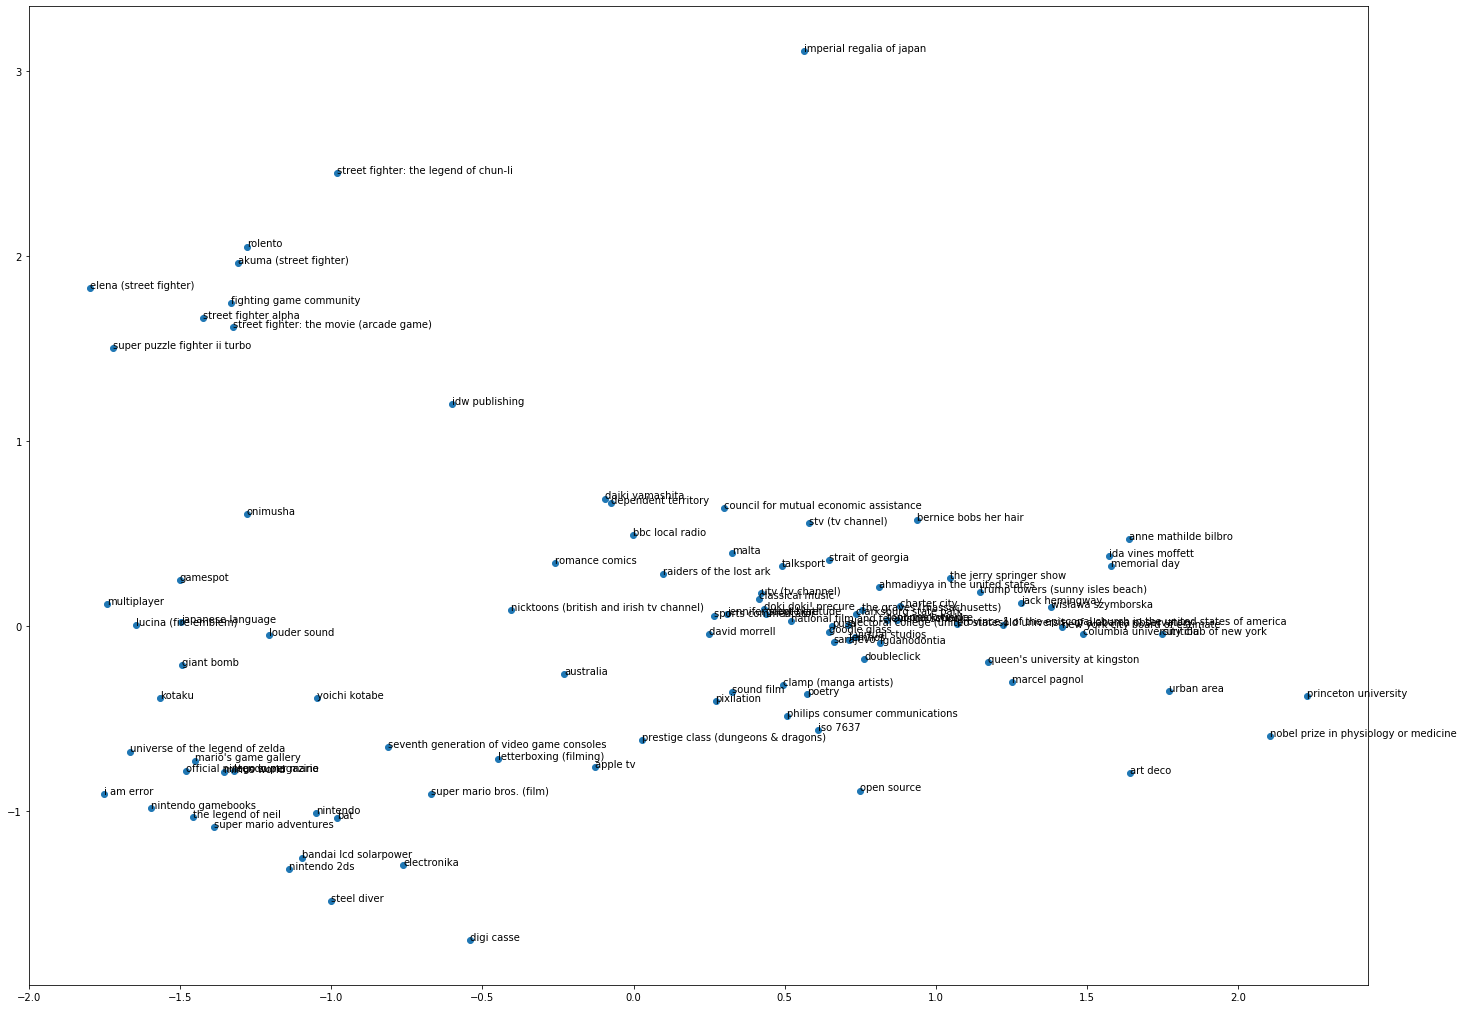

In [144]:
terms = random.sample(finally_word, 100)
plot_nodes(terms)

In [1]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

import  time
t1 = time.time()
model = Word2Vec.load('gen/model')
t2 = time.time()
print(model)
print(".molde load time %.4f"%(t2-t1))
# find top n similar nodes
all_wordList=['genshin impact','animal crossing','the legend of zelda','nintendo switch','playstation 5']

similar_wordList=['genshin impact','animal crossing','the legend of zelda','nintendo switch','playstation 5']

for word in all_wordList:
    for tmp in model.similar_by_word(word,topn=10): #选最近的5个
        similar_wordList.append(tmp[0])


def plot_nodes(word_list):
    X = model[word_list]

    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)

    plt.figure(figsize=(20, 20))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    print(word_list)
    for i, word in enumerate(word_list):
        print(i, word)
        # if i>5:
        #     ttext = '{}->{}'.format(int((i-5)/5),(i-5)%5)
        # else:
        #     ttext = '[{}]'.format(i)
        plt.annotate(i, xy=(result[i, 0], result[i, 1]))
    plt.gca().set_aspect('equal', 'datalim')
    plt.ylim(-2, 2)
    plt.title('cosine measure')
    plt.savefig('./cosine measure.jpg')
    plt.show()

plot_nodes(similar_wordList)

Word2Vec(vocab=75865, size=100, alpha=0.03)
.molde load time 1.3372
['genshin impact', 'animal crossing', 'the legend of zelda', 'nintendo switch', 'playstation 5', 'redditor', 'xda-developers', 'kfc', 'zhangjiajie national forest park', 'tianmen mountain', 'floating cities and islands in fiction', 'quest (video games)', 'shanghai symphony orchestra', 'chinese culture', 'vladimir putin', 'dōbutsu no mori e+', 'animal talking with gary whitta', 'animal crossing: amiibo festival', 'nissan gt-r', 'animal crossing plaza', 'wii music', 'cubello', 'animal crossing: city folk', 'boxboy! (video game)', 'tom nook', 'grand theft auto (series)', 'tinker bell', 'the legend of zelda: oracle of seasons', 'the legend of zelda: wind waker hd', 'spacey awards', 'epona (character)', 'heuristic', 'loz', 'origin systems', 'the legend of zelda: twilight princess', 'wii u', 'ricoh 5a22', 'joy-con', 'msrp', 'microkernel', 'nand flash memory', 'texture mapping unit', 'near-field communications', '802.11b', 'u

<Figure size 2000x2000 with 1 Axes>